# Zadanie 5

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]


In [4]:
import gymnasium
from gymnasium.core import Env
import numpy as np
import random
from matplotlib import pyplot as plt
import time
from typing import Tuple

In [5]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
            self,
            observation_space: int,
            action_space: int,
            learning_rate: float = 0.1,
            gamma: float = 0.9,
            epsilon: float = 0.1,
    ):
        self._observation_space = observation_space
        self._action_space = action_space
        self._learning_rate = learning_rate
        self._gamma = gamma
        self._epsilon = epsilon

        self._q_table = np.zeros((self._observation_space, self._action_space))

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self._q_table[state, action]

    def update(self, state: np.ndarray, new_state, action: np.ndarray,
               reward: float) -> None:
        """Update Q-value of given state and action."""
        delta = reward + self._gamma * np.max(self._q_table[new_state]) - self._q_table[state, action]

        self._q_table[state, action] = self._q_table[state, action] + self._learning_rate * delta 

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""

        if random.uniform(0, 1) < self._epsilon:
            # Explore
            return np.random.randint(low=0, high=self._action_space)
        else:
            # Get best or exploit
            return np.argmax(self._q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        pass

    def __str__(self):
        return self.__repr__()

In [17]:
def train(environment: Env, epochs: int, steps_per_epoch: int,
          parameters: dict, verbose=0) -> Tuple['QLearningSolver', list, list]:

    solver = QLearningSolver(
                environment.observation_space.n, environment.action_space.n,
                learning_rate=parameters["learning_rate"],
                gamma=parameters["gamma"],
                epsilon=parameters["epsilon"]
            )

    rewards = []
    results = []
    successful_epochs = 0

    for epoch in range(epochs):
        if verbose == 1:
            print(f"Epoch: {epoch}/{epochs}")

        state = environment.reset()[0]

        epoch_accumulated_reward = 0
        done = False
        for step in range(steps_per_epoch):
            move = solver.get_best_action(state)
            next_state, reward, done, _, _ = environment.step(int(move))
            epoch_accumulated_reward += reward

            solver.update(state, next_state, move, float(reward))
            state = next_state
            if done:
                break

        if done:
            successful_epochs += 1
            if verbose == 1:
                print(f"Epoch {epoch} successful!")
        else:
            if verbose == 1:
                print(f"Epoch {epoch} unsuccessful!")
        rewards.append(epoch_accumulated_reward)
        results.append(done)

    if verbose == 1:
        print(f"Successful episodes: {successful_epochs}/{epochs}")

    return solver, rewards, results

In [35]:
def test_solver(environment: Env, tests: int, tries_per_tests: int, verbose=0) -> Tuple[list, list, float]:
    rewards = []
    results = []
    successful_tests = 0

    for test in range(tests):
        if verbose == 1:
            print(f"Epoch: {test}/{tests}")

        state = environment.reset()[0]
        epoch_accumulated_reward = 0
        done = False
        for test_try in range(tries_per_tests):
            move = solver.get_best_action(state)
            next_state, reward, done, _, _ = environment.step(int(move))
            epoch_accumulated_reward += reward

            state = next_state
            if done:
                break

        if done:
            successful_tests += 1
            if verbose == 1:
                print(f"Epoch {test} successful!")
        else:
            if verbose == 1:
                print(f"Epoch {test} unsuccessful!")

    accuracy = successful_tests/tests
    if verbose == 1:
        print(f"Successful episodes: {successful_tests}/{tests}")
        print(f"Accuracy: {accuracy:.2f}")
    return rewards, results, accuracy


In [31]:
train_epochs = 1000
parameters = {"learning_rate": 0.95, "gamma": 0.8, "epsilon": 0.1}
solver, rewards, results = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters, verbose=1)

Epoch: 0/1000
Epoch 0 unsuccessful!
Epoch: 1/1000
Epoch 1 unsuccessful!
Epoch: 2/1000
Epoch 2 unsuccessful!
Epoch: 3/1000
Epoch 3 unsuccessful!
Epoch: 4/1000
Epoch 4 unsuccessful!
Epoch: 5/1000
Epoch 5 unsuccessful!
Epoch: 6/1000
Epoch 6 unsuccessful!
Epoch: 7/1000
Epoch 7 unsuccessful!
Epoch: 8/1000
Epoch 8 unsuccessful!
Epoch: 9/1000
Epoch 9 unsuccessful!
Epoch: 10/1000
Epoch 10 unsuccessful!
Epoch: 11/1000
Epoch 11 unsuccessful!
Epoch: 12/1000
Epoch 12 unsuccessful!
Epoch: 13/1000
Epoch 13 unsuccessful!
Epoch: 14/1000
Epoch 14 unsuccessful!
Epoch: 15/1000
Epoch 15 unsuccessful!
Epoch: 16/1000
Epoch 16 unsuccessful!
Epoch: 17/1000
Epoch 17 unsuccessful!
Epoch: 18/1000
Epoch 18 unsuccessful!
Epoch: 19/1000
Epoch 19 unsuccessful!
Epoch: 20/1000
Epoch 20 unsuccessful!
Epoch: 21/1000
Epoch 21 unsuccessful!
Epoch: 22/1000
Epoch 22 unsuccessful!
Epoch: 23/1000
Epoch 23 unsuccessful!
Epoch: 24/1000
Epoch 24 unsuccessful!
Epoch: 25/1000
Epoch 25 unsuccessful!
Epoch: 26/1000
Epoch 26 unsucces

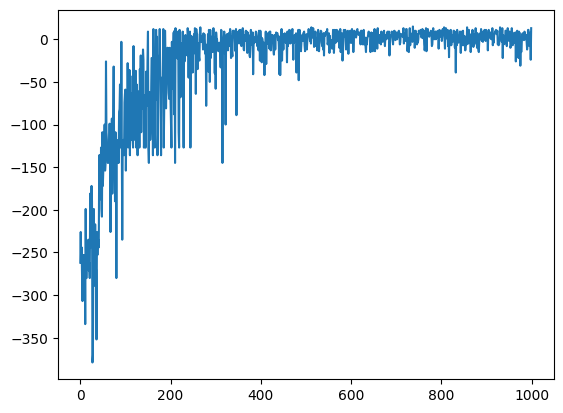

In [32]:
plt.plot([x for x in range(train_epochs)], rewards)

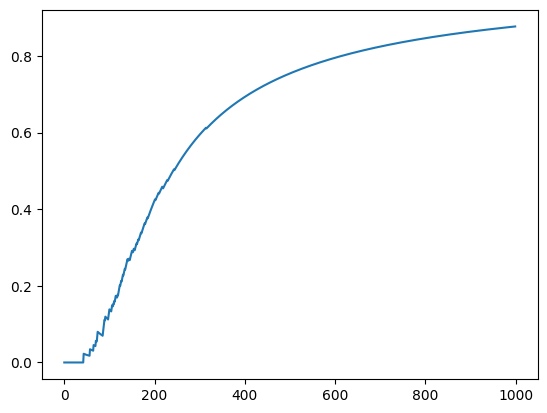

In [33]:
accumulated_accuracies = [len([results[x] for x in range(i) if results[x]])/i for i in range(1,train_epochs+1)]
plt.plot([x for x in range(train_epochs)], accumulated_accuracies)
plt.show()

In [39]:
tests = 1000
parameters = {"learning_rate": 0.95, "gamma": 0.8, "epsilon": 0.1}
rewards, results, accuracy = test_solver(gymnasium.make('Taxi-v3'), tests, 100, verbose=1)

Epoch: 0/1000
Epoch 0 successful!
Epoch: 1/1000
Epoch 1 successful!
Epoch: 2/1000
Epoch 2 successful!
Epoch: 3/1000
Epoch 3 successful!
Epoch: 4/1000
Epoch 4 successful!
Epoch: 5/1000
Epoch 5 successful!
Epoch: 6/1000
Epoch 6 successful!
Epoch: 7/1000
Epoch 7 successful!
Epoch: 8/1000
Epoch 8 successful!
Epoch: 9/1000
Epoch 9 unsuccessful!
Epoch: 10/1000
Epoch 10 successful!
Epoch: 11/1000
Epoch 11 successful!
Epoch: 12/1000
Epoch 12 successful!
Epoch: 13/1000
Epoch 13 successful!
Epoch: 14/1000
Epoch 14 successful!
Epoch: 15/1000
Epoch 15 successful!
Epoch: 16/1000
Epoch 16 successful!
Epoch: 17/1000
Epoch 17 successful!
Epoch: 18/1000
Epoch 18 successful!
Epoch: 19/1000
Epoch 19 successful!
Epoch: 20/1000
Epoch 20 successful!
Epoch: 21/1000
Epoch 21 successful!
Epoch: 22/1000
Epoch 22 successful!
Epoch: 23/1000
Epoch 23 successful!
Epoch: 24/1000
Epoch 24 successful!
Epoch: 25/1000
Epoch 25 successful!
Epoch: 26/1000
Epoch 26 successful!
Epoch: 27/1000
Epoch 27 successful!
Epoch: 28/

Learned agent
Finished
Successful try


# Eksperymenty

# Wnioski